In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
import os
os.sys.executable


'D:\\Anaconda\\New folder\\envs\\py3\\python.exe'

## Choose 20170309_play.log.fn to explore

In [74]:
colname = ['uid', 'device', 'song_id', 'song_type', 'song_name', 'singer', 'play_time', 'song_length', 'paid_flag', 'file_name']
dtype={'uid':float, 'device':str, 'song_id':float, 'song_type':float, 'song_name':str, 'singer':str, 'play_time':float, 'song_length':float, 'paid_flag':float, 'file_name':object}
play309 = pd.read_csv("D:/MusicFile/play/20170309_1_play.log.fn", 
                      sep = '\t', header = None, dtype = dtype,
                      error_bad_lines = False)
#find 11 lines are mislocation, so ignore them
#so that there will be no need to clean for incorrect value for each columns


b'Skipping line 47014: expected 10 fields, saw 11\n'
b'Skipping line 95410: expected 10 fields, saw 11\nSkipping line 115487: expected 10 fields, saw 11\n'
b'Skipping line 159582: expected 10 fields, saw 11\n'
b'Skipping line 447670: expected 10 fields, saw 11\n'
b'Skipping line 485305: expected 10 fields, saw 11\nSkipping line 486844: expected 10 fields, saw 11\n'
b'Skipping line 760611: expected 10 fields, saw 11\nSkipping line 760623: expected 10 fields, saw 11\nSkipping line 760636: expected 10 fields, saw 11\nSkipping line 760643: expected 10 fields, saw 11\nSkipping line 760655: expected 10 fields, saw 11\nSkipping line 760685: expected 10 fields, saw 11\nSkipping line 760690: expected 10 fields, saw 11\nSkipping line 760710: expected 10 fields, saw 11\n'
b'Skipping line 899915: expected 10 fields, saw 11\n'
b'Skipping line 1060595: expected 10 fields, saw 11\nSkipping line 1072675: expected 10 fields, saw 11\nSkipping line 1072693: expected 10 fields, saw 11\nSkipping line 10727

In [75]:
play309.columns = colname
play309.head()

,uid,device,song_id,song_type,song_name,singer,play_time,song_length,paid_flag,file_name
0,154607971.0,ar,6684171,0,走天涯,降央卓玛,64,271,0.0,20170309_1_play.log
1,154801140.0,ar,1967746,0,浅浅的笑,夏后,0,0,0.0,20170309_1_play.log
2,154801140.0,ar,3222553,0,小情绪,夏后,196,196,0.0,20170309_1_play.log
3,154801140.0,ar,11425031,0,童话镇,陈一发,257,257,0.0,20170309_1_play.log
4,154801140.0,ar,21295307,0,皮皮虾我们走,MC马克,115,116,0.0,20170309_1_play.log


In [76]:
print(play309.shape)
print(play309.describe())
print(play309.dtypes)
#we know uid, song_id, song_type, play_time, song_length, paid_flag should all be float, if there are not, there must be some bad values
play309[['song_id', 'song_type', "play_time", "song_length"]] = play309[['song_id', 'song_type', "play_time", "song_length"]]\
.apply(pd.to_numeric, errors='ignore')
print(play309.dtypes)

(1172799, 10)
                uid  paid_flag
count  1.172369e+06  1171939.0
mean   1.355000e+08        0.0
std    4.761660e+07        0.0
min    0.000000e+00        0.0
25%    1.544497e+08        0.0
50%    1.545913e+08        0.0
75%    1.547258e+08        0.0
max    1.584779e+08        0.0
uid            float64
device          object
song_id         object
song_type       object
song_name       object
singer          object
play_time       object
song_length     object
paid_flag      float64
file_name       object
dtype: object
uid            float64
device          object
song_id         object
song_type       object
song_name       object
singer          object
play_time       object
song_length     object
paid_flag      float64
file_name       object
dtype: object


In [19]:
#is there any missing values?
pd.DataFrame({'miss cnt': play309.isnull().sum(axis = 0),
             'miss precent': play309.isnull().sum(axis = 0)/play309.shape[0]*100})
#there are at most 860 missing rows among 1172799 rows, 


,miss cnt,miss precent
uid,430,0.036664
device,0,0.000000
song_id,0,0.000000
song_type,0,0.000000
song_name,0,0.000000
singer,430,0.036664
play_time,860,0.073329
song_length,860,0.073329
paid_flag,860,0.073329
file_name,860,0.073329


In [20]:
#check whether they are from the same uid, if so, they can be dropped.
play309.loc[play309.isnull().sum(axis = 1)>=play309.shape[1]-1]
#there is none, so first drop rows without uid

,uid,device,song_id,song_type,song_name,singer,play_time,song_length,paid_flag,file_name


In [77]:
#check uid
print(play309[play309.uid.isnull()].head())
print("How many", play309.uid.isnull().sum())
play309 = play309.dropna(subset = ['uid'])
#print(play309.dropna(subset = ['uid']).head())
print(play309.shape)

       uid      device song_id song_type song_name                singer  \
69     NaN       乌兰图雅       2        22         0    20170309_1_play.log   
414    NaN       乌兰图雅       0        22         0    20170309_1_play.log   
7695   NaN       乌兰图雅      22        22         0    20170309_1_play.log   
10931  NaN        胡彦斌      67        68         0    20170309_1_play.log   
22585  NaN  渔圈&amp;C蓝      28        29         0    20170309_1_play.log   

      play_time song_length  paid_flag file_name  
69          NaN         NaN        NaN       NaN  
414         NaN         NaN        NaN       NaN  
7695        NaN         NaN        NaN       NaN  
10931       NaN         NaN        NaN       NaN  
22585       NaN         NaN        NaN       NaN  
How many 430
(1172369, 10)


In [97]:
play309.uid.value_counts()

1685126.0      59093
37025504.0     48150
26036032.0     10960
28638487.0      6452
398309.0        5541
1749320.0       5428
0.0             4234
1677249.0       3816
154712043.0     3496
1883192.0       3240
154549077.0     2490
533817.0        1898
154436348.0     1591
154482414.0     1530
154822367.0     1462
154733676.0     1447
154486607.0     1207
154461657.0     1106
57820269.0      1075
154607971.0     1051
154768977.0     1005
32166203.0      1000
154733229.0      896
154790230.0      882
156263019.0      827
154730998.0      822
154735552.0      790
154695911.0      785
154756620.0      774
154580251.0      740
               ...  
154621305.0        1
154436814.0        1
154451266.0        1
154450955.0        1
154620972.0        1
154631134.0        1
154790307.0        1
3907096.0          1
154723352.0        1
154682269.0        1
154450758.0        1
154628209.0        1
154766858.0        1
154723754.0        1
154789307.0        1
154761748.0        1
154625134.0  

We find just in one day, there are some user played more than 50000 songs, which is really abnormal. Maybe these user are tester or robots.

ar     984839
ip     187530
Name: device, dtype: int64
precentage of each platform:
ar     0.840042
ip     0.159958
Name: device, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x194B6DF0>],
      dtype=object)

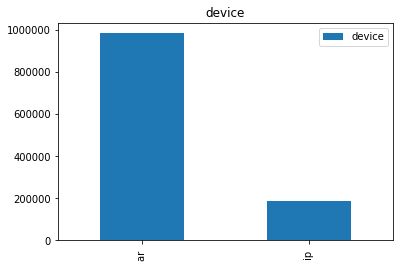

In [50]:
#check the device column
print(play309['device'].value_counts())
print("precentage of each platform:")
print(play309['device'].value_counts()/play309.shape[0])
pd.DataFrame(play309['device'].value_counts()).plot(kind = 'bar', subplots = True)


There are 84% user use Android, only 16% user use IPhone. Later we can check the churn rate form each platform.

In [63]:
#song_id
print(play309.song_id.value_counts().head())
print(len(play309.song_id.unique()))
#there are 156791 songs.But there are 92071 song_id, which is 0..

0            92071
15249349     10692
9950164       9261
15807836      5387
5237384       4053
Name: song_id, dtype: int64
156791


In [64]:
#song_type
play309.song_type.value_counts()
#need domain information about the definition of song_type, 
#maybe categorized by region/restricted or not..

0     1036871
1      122885
2       11342
         1206
3          65
Name: song_type, dtype: int64

Song_name and Singer contains Chinese Characters, but it is OK, we will explore them later if needed

##### play_time 
Since one file is the record of one day, so play_time means how many second a user play this song in a day, the minimum value should be 0, which means the user accidentally play this song, and immediately stop it. The maximum should not be over 72000, also for a user's total play time, since extremely small amount of real user would listen more than 20 hours, if we are focusing on analyzing the behavior and trend of majority user, those outliers should be dropped.
##### song_length
It is possible for song_length being 0, especially for those songs' play time is not 0. That means the songs are actually exist, but we lack the information of that song. If possible, fill it with possible play time.

If the play_time is much more than song_length, that means the user continuous listen to this song several times, in that case, we cannot impute song_length with play_time.

In [85]:
#check the missin data for both columns
print(play309[play309['play_time'].isnull()].head())
print(play309[play309['play_time'].isnull()].shape)
#there are another 430 rows with NAN in the last 5 columns. drop them

               uid device   song_id song_type        song_name singer  \
68     154829204.0    ar   6112434         0     草原一枝花(22秒铃声版)    NaN   
413    154829204.0    ar   6112434         0     草原一枝花(22秒铃声版)    NaN   
7694   154829204.0    ar   6112434         0     草原一枝花(22秒铃声版)    NaN   
10930  154658189.0    ar   6213204         0   男人KTV(1分08秒铃声版)    NaN   
22584  154582795.0    ar   6210560         0   你说过,我信过(29秒铃声版)    NaN   

      play_time song_length  paid_flag file_name  
68          NaN         NaN        NaN       NaN  
413         NaN         NaN        NaN       NaN  
7694        NaN         NaN        NaN       NaN  
10930       NaN         NaN        NaN       NaN  
22584       NaN         NaN        NaN       NaN  
(430, 10)


In [89]:
play309 = play309.dropna(subset = ['play_time'])
print(play309.shape)

(1171939, 10)


dtype('O')

In [92]:
#change dtypes from objects to numeric, so that they canbe compared
play309['play_time'] = pd.to_numeric(play309['play_time'], errors = 'coerce')
print(play309['play_time'].dtype)
play309['song_length'] = pd.to_numeric(play309['song_length'], errors = 'coerce')
print(play309['song_length'].dtype)

float64
float64


In [109]:
play309[['play_time', 'song_length']].describe()

,play_time,song_length
count,1.164075e+06,1.171931e+06
mean,6.156524e+03,2.457152e+02
std,6.766279e+05,1.405158e+03
min,-1.097109e-01,-1.000000e+00
25%,6.000000e+00,1.670000e+02
50%,1.590000e+02,2.320000e+02
75%,2.490000e+02,2.730000e+02
max,6.852882e+08,3.920000e+05


Find there are negative value, which is impossible, drop

In [111]:
play309['play_time'] = play309['play_time'][play309['play_time']>0]
play309['song_length'] = play309['song_length'][play309['song_length']>0]

In [112]:
#play_length >song_length
print("play_time > song_length")
print(play309.loc[play309['play_time']>play309['song_length']].count())
play309.loc[play309['play_time']>play309['song_length']].head()

play_time > song_length
uid            49645
device         49645
song_id        49645
song_type      49645
song_name      49645
singer         49645
play_time      49645
song_length    49645
paid_flag      49645
file_name      49645
dtype: int64


,uid,device,song_id,song_type,song_name,singer,play_time,song_length,paid_flag,file_name
14,154791432.0,ar,124335,0,最佳损友,陈奕迅,236.0,235.0,0.0,20170309_1_play.log
34,154805283.0,ar,218036,0,从今开始,黎明,237.0,236.0,0.0,20170309_1_play.log
50,154445920.0,ar,4441094,0,殇雪,云菲菲,285.0,284.0,0.0,20170309_1_play.log
115,154800971.0,ar,6468891,0,演员,薛之谦,262.0,261.0,0.0,20170309_1_play.log
161,154631552.0,ar,7176392,0,成都,赵雷,125.0,124.0,0.0,20170309_1_play.log


As we can see, a lot of rows in this condition is due to song_length = 0, and many of it just 1 second more than song_length, which might be due to the technical measurment error, can be ignored. Impute song_length with play_time, if play_time is under 500 seconds.

In [100]:
play309.loc[play309['play_time']>play309['song_length']*1.05].count()

uid            120649
device         120649
song_id        120649
song_type      120649
song_name      120649
singer         120649
play_time      120649
song_length    120649
paid_flag      120649
file_name      120649
dtype: int64

there are 146382-120649 for the technical measurement error.

In [114]:
play309['song_length'].fillna(play309['play_time']).head()

0    271.0
1      NaN
2    196.0
3    257.0
4    116.0
Name: song_length, dtype: float64

In [115]:
#Paid_flag
play309['paid_flag'].value_counts()

0.0    1171939
Name: paid_flag, dtype: int64

Only one value, this column is useless.